# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import os
from datetime import datetime
import seaborn as sns

# Import Data Frame

In [2]:
# This snippet assumes you run setup first

# This code copies file in your Google Bucket and loads it into a dataframe

# Replace 'test.csv' with THE NAME of the file you're going to download from the bucket (don't delete the quotation marks)
name_of_file_in_bucket = 'all_var.csv'

########################################################################
##
################# DON'T CHANGE FROM HERE ###############################
##
########################################################################

# get the bucket name
my_bucket = os.getenv('WORKSPACE_BUCKET')

# copy csv file from the bucket to the current working space
os.system(f"gsutil cp '{my_bucket}/data/{name_of_file_in_bucket}' .")

print(f'[INFO] {name_of_file_in_bucket} is successfully downloaded into your working space')
# save dataframe in a csv file in the same workspace as the notebook
my_dataframe = pd.read_csv(name_of_file_in_bucket)
my_dataframe.head()


Copying gs://fc-secure-0d0aa1f4-dcaf-49ec-b0d7-9a52c2f50113/data/all_var.csv...
/ [1 files][  6.6 MiB/  6.6 MiB]                                                
Operation completed over 1 objects/6.6 MiB.                                      


[INFO] all_var.csv is successfully downloaded into your working space


,person_id,pain,smk,alc,exr,bmi,age,sex,BC,BG,BP,hom,fib,PAD
0,1557088,1,0,1,1,24.799999,60.605479,1,322.0,257,159.666667,18.3,664.0,1
1,2175435,1,1,1,1,26.500000,63.772603,1,198.0,101,130.000000,0.0,0.0,1
2,1014037,1,0,1,1,40.599998,82.383562,1,211.0,236,123.000000,0.0,0.0,1
3,2411364,1,0,1,1,24.799999,75.657534,0,308.0,98,116.666667,7.5,0.0,1
4,1185518,1,0,1,1,19.900000,74.654795,0,207.0,110,120.333333,0.0,0.0,1


# Prepare Training Sets, Validation Sets and Test Sets

In [6]:
my_dataframe = my_dataframe[my_dataframe['BC'] != 0]
my_dataframe =  my_dataframe[my_dataframe['BC'] < 1000]
my_dataframe = my_dataframe[my_dataframe['BG'] != 0]
my_dataframe =  my_dataframe[my_dataframe['BG'] < 1000]
my_dataframe = my_dataframe[my_dataframe['BP'] != 0]
my_dataframe =  my_dataframe[my_dataframe['BP'] < 1000]
my_dataframe = my_dataframe[my_dataframe['bmi'] != 0]
my_dataframe = my_dataframe[my_dataframe['bmi'] < 1000]
my_dataframe = my_dataframe[my_dataframe['age'] != 0]
my_dataframe = my_dataframe[my_dataframe['age'] < 1000]
my_dataframe = my_dataframe[my_dataframe['fib'] != 0]
my_dataframe.head()
case = my_dataframe[my_dataframe['PAD'] == 1]
control = my_dataframe[my_dataframe['PAD'] == 0]

In [7]:
features_ctn = ['bmi','age', 'BG', 'BP', 'fib']
features_bin = ['pain', 'smk', 'sex']

x_ctn = my_dataframe.loc[:, features_ctn].values
x_bin = my_dataframe.loc[:, features_bin].values


y_df = my_dataframe.loc[:, ['PAD']].values

y = y_df.ravel()

x_ctn = StandardScaler().fit_transform(x_ctn)

# Check the standardized data
x_std = pd.concat([pd.DataFrame(x_bin), pd.DataFrame(x_ctn)], axis=1)
x_std.columns = ['pain', 'smk', 'sex', 'bmi', 'age', 'BG', 'BP', 'fib']
x_std.head()
# print(len(x_std))

,pain,smk,sex,bmi,age,BG,BP,fib
0,1,0,1,-0.800397,-0.351452,0.076430,0.670859,-0.010923
1,1,0,1,-0.483072,-0.514061,-0.393071,-0.189026,-0.010455
2,1,1,1,0.402793,-0.280671,-0.432747,0.015373,-0.011297
3,1,1,1,-0.165747,0.097054,0.301261,-0.083303,-0.014105
4,1,1,1,-1.157387,1.497391,-0.340170,0.212723,-0.013177


In [19]:
# Split the x data into 70% training and 30% temporary set
train_x, temp_x = train_test_split(x_std, test_size=0.3, random_state=42)
# Split the temporary set into 10% validation and 20% test set
# Since the temporary set is 30% of the original, we split it into 1/3 (validation) and 2/3 (test) 
validate_x, test_x = train_test_split(temp_x, test_size=2/3, random_state=42)

y = np.array(y).astype(int)

# Split the y data into 70% training and 30% temporary set
y_train, y_temp = train_test_split(y, test_size=0.3, random_state=42)
# Split the temporary set into 10% validation and 20% test set
# Since the temporary set is 30% of the original, we split it into 1/3 (validation) and 2/3 (test) 
y_valid, y_test = train_test_split(y_temp, test_size=2/3, random_state=42)

# train = np.concatenate((train_df_P, train_df_N), axis=0)
# valid = np.concatenate((validate_df_P, validate_df_N), axis=0)
# test = np.concatenate((test_df_P, test_df_N), axis=0)

# print(f"Length of Training set: {len(train)}")
# print(f"Length of Validation set: {len(valid)}")
# print(f"Length of Test set: {len(test)}")

X_train = (train_x.iloc[:, 0:]).values
# X_train = np.concatenate((X_train[:, : -3], X_train[:, -1:]), axis=1)
X_valid = (validate_x.iloc[:, 0:]).values
# X_valid = np.concatenate((X_valid[:, : -3], X_valid[:, -1:]), axis=1)
X_test = (test_x.iloc[:, 0:]).values
# X_test = np.concatenate((X_test[:, : -3], X_test[:, -1:]), axis=1)
print(X_train)
print(X_train.shape)
# print(X_valid[:5])
# print(y_valid)

[[ 1.          1.          1.         ...  1.48493288  0.61447309
  -0.00931634]
 [ 0.          1.          1.         ... -0.61128992 -0.47095565
  -0.01307517]
 [ 1.          0.          0.         ... -0.39307114 -0.32999088
  -0.01073565]
 ...
 [ 0.          1.          0.         ... -0.59806454 -0.10444724
  -0.0134183 ]
 [ 0.          0.          0.         ... -1.07417823 -0.28065321
  -0.01408896]
 [ 0.          0.          0.         ...  1.2733268   1.0726086
  -0.01136732]]
(4256, 8)


# PCA and Data Visualization

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x_std)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,0.057626,0.454059,-0.115725
1,-0.318572,-0.387915,0.025257
2,0.123619,-0.387768,0.014253
3,-0.075170,0.373981,-0.040781
4,-1.465120,1.315481,-0.199961


In [81]:
y_df = pd.DataFrame(y)
y_df.columns = ['PAD']
finalDf = pd.concat([principalDf, y_df], axis = 1)
finalDf.tail()

,principal component 1,principal component 2,principal component 3,PAD
6075,1.539349,-1.668131,0.164994,0
6076,-0.456248,-0.074263,-0.086014,0
6077,-0.983221,0.356234,-0.017030,0
6078,0.318339,-0.723931,0.099019,0
6079,0.766606,-0.137038,-0.089841,0


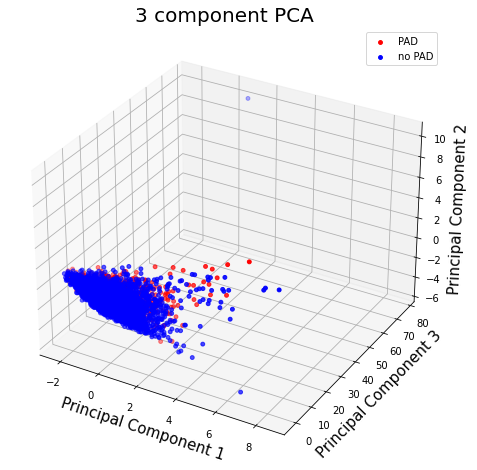

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')  # Set the projection to '3d'

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_zlabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['PAD'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15)
    
ax.legend(['PAD', 'no PAD'])
ax.grid()

# SVM Model

In [54]:
# Code for SVM algorithm

C_grid = np.logspace(-3, 1, 20)

Pe_val_svm = []

for i in C_grid:
    
    SVM_clf = svm.SVC(C=i, kernel='linear')
    SVM_clf.fit(X_train, y_train)
    Pe_val_svm.append(1-SVM_clf.score(X_valid, y_valid))
    print('FINISH:{i}'.format(i=i))
    
opt_C = C_grid[np.argmin(Pe_val_svm)]
print('The best C for SVM is {C}'.format(C=opt_C))

FINISH:0.001
FINISH:0.001623776739188721
FINISH:0.0026366508987303583
FINISH:0.004281332398719396
FINISH:0.0069519279617756054
FINISH:0.011288378916846888
FINISH:0.018329807108324356
FINISH:0.029763514416313176
FINISH:0.04832930238571752
FINISH:0.07847599703514611
FINISH:0.12742749857031335
FINISH:0.20691380811147903
FINISH:0.3359818286283781
FINISH:0.5455594781168515
FINISH:0.8858667904100823
FINISH:1.438449888287663
FINISH:2.3357214690901213
FINISH:3.792690190732246
FINISH:6.158482110660261
FINISH:10.0
The best C for SVM is 0.001


In [55]:
SVM_clf = svm.SVC(C=opt_C, kernel='linear')
SVM_clf.fit(np.concatenate((X_train, X_valid), axis=0), np.concatenate((y_train, y_valid), axis=0))
Pe_svm = 1-SVM_clf.score(X_test, y_test)
print('The test error for SVM is {Pe}'.format(Pe=Pe_svm))

The test error for SVM is 0.22368421052631582


In [56]:
SVM_clf.coef_

array([[ 5.44007231e-06,  3.05688386e-06,  3.94796500e-06,
         5.79153619e-06,  8.74428787e-06,  2.38335307e-06,
        -1.72673080e-05,  2.72560524e-07]])

In [20]:
SVM = svm.SVC(kernel='rbf')

start = datetime.now()
SVM.fit(np.concatenate((X_train, X_valid), axis=0), np.concatenate((y_train, y_valid), axis=0))
end = datetime.now()

Pe_rbf = 1-SVM.score(X_test, y_test)
print('The test error for RBF is {Pe}'.format(Pe=Pe_rbf))

t_svm = end - start
print(f"Time cost for RBF: {t_svm}")

The test error for RBF is 0.22286184210526316
Time cost for RBF: 0:00:01.289947


In [16]:
import shap
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
X = np.concatenate((X_train, X_valid), axis=0
# Create a SHAP explainer and calculate SHAP values
                   
explainer = shap.KernelExplainer(SVM.predict_proba, shap.sample(X, 100))

shap_values = explainer.shap_values(X)

# Summarize the SHAP values for the first class
shap.summary_plot(shap_values[0], X)


SyntaxError: invalid syntax (1546920945.py, line 8)

In [58]:
y_pred_svm = SVM.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm) 
print("Confusion Matrix:") 
print(cm_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f1_svm)

Confusion Matrix:
[[944   0]
 [271   1]]
0.007326007326007326


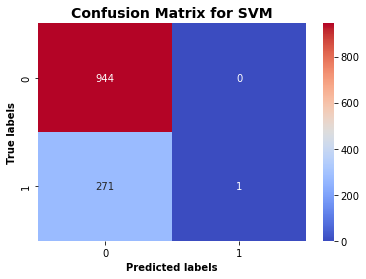

In [59]:
color_palette = "coolwarm"
sns.heatmap(cm_svm, annot=True, fmt='g', cmap=color_palette)
plt.xlabel('Predicted labels', fontsize=10, fontweight='bold')
plt.ylabel('True labels',  fontsize=10, fontweight='bold')
plt.title('Confusion Matrix for SVM', fontsize=14, fontweight='bold')
plt.show()

# LR Model

In [60]:
# Code for Logistic Regression algorithm

C_grid = np.logspace(-3, 1, 50)

Pe_val_lr = []

for i in C_grid:
    
    LR_clf = LogisticRegression(C=i, solver='liblinear', random_state=0)
    LR_clf.fit(X_train, y_train)
    Pe_val_lr.append(1-LR_clf.score(X_valid, y_valid))
#     print('FINISH:{i}'.format(i=i))
    
opt_C = C_grid[np.argmin(Pe_val_lr)]
print('The best C for Logistic Regression is {C}'.format(C=opt_C))
# print(Pe_val_lr)

The best C for Logistic Regression is 0.19306977288832497


In [61]:
LR_clf = LogisticRegression(C=opt_C, solver='liblinear', random_state=0)

start = datetime.now()
LR_clf.fit(np.concatenate((X_train, X_valid), axis=0), np.concatenate((y_train, y_valid), axis=0))
end = datetime.now()

Pe_lr = 1-LR_clf.score(X_test, y_test)
print('The test error for Logistic Regression is {Pe}'.format(Pe=Pe_lr))
t_lr = end - start
print(f"Time cost for Logistic Regression: {t_lr}")

The test error for Logistic Regression is 0.22779605263157898
Time cost for Logistic Regression: 0:00:00.012103


In [62]:
LR_clf.coef_

array([[ 0.37329619,  0.35286169,  0.2402759 , -0.07968134,  0.23882455,
         0.35845428,  0.17312045, -0.04892378]])

In [63]:
y_pred_lr = LR_clf.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr) 
print("Confusion Matrix:") 
print(cm_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f1_lr)

Confusion Matrix:
[[926  18]
 [259  13]]
0.0858085808580858


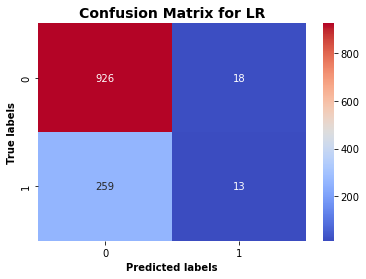

In [64]:
color_palette = "coolwarm"
sns.heatmap(cm_lr, annot=True, fmt='g', cmap=color_palette)
plt.xlabel('Predicted labels', fontsize=10, fontweight='bold')
plt.ylabel('True labels',  fontsize=10, fontweight='bold')
plt.title('Confusion Matrix for LR', fontsize=14, fontweight='bold')
plt.show()

# RF Model

In [9]:
# Code for Random Forest algorithm
RF_clf = RandomForestClassifier(n_estimators=250,random_state=42)

start = datetime.now()
RF_clf.fit(np.concatenate((X_train, X_valid), axis=0), np.concatenate((y_train, y_valid), axis=0))
end = datetime.now()

Pe_rf = 1-RF_clf.score(X_test, y_test)
print('The test error for Random Forest is {Pe}'.format(Pe=Pe_rf))
t_rf = end - start
print(f"Time cost for Logistic Regression: {t_rf}")

The test error for Random Forest is 0.22286184210526316
Time cost for Logistic Regression: 0:00:02.094598


In [11]:
# Feature importances
importances = RF_clf.feature_importances_
print(importances)

[0.02019306 0.01912377 0.017727   0.17908554 0.19485527 0.20046014
 0.18875274 0.17980248]


In [66]:
y_pred_rf = RF_clf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf) 
print("Confusion Matrix:") 
print(cm_rf)
accuracy_rf = (cm_rf[0][0]+cm_rf[1][1])/(cm_rf[0][1] + cm_rf[1][0] +cm_rf[0][0] +cm_rf[1][1]) 
print(accuracy_rf*100) 

Confusion Matrix:
[[924  20]
 [251  21]]
77.71381578947368


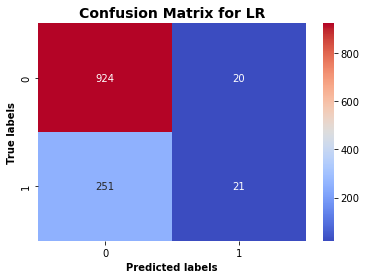

In [67]:
color_palette = "coolwarm"
sns.heatmap(cm_rf, annot=True, fmt='g', cmap=color_palette)
plt.xlabel('Predicted labels', fontsize=10, fontweight='bold')
plt.ylabel('True labels',  fontsize=10, fontweight='bold')
plt.title('Confusion Matrix for LR', fontsize=14, fontweight='bold')
plt.show()

# Deep Learning

In [6]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense 

In [134]:
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 8, units = 14, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu", units = 8, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'] ) 

In [135]:
start = datetime.now()
classifier.fit(np.concatenate((X_train, X_valid), axis=0), np.concatenate((y_train, y_valid), axis=0), batch_size = 8,epochs = 100)
end = datetime.now()
t_dl = end - start

Epoch 1/100
608/608 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7961
Epoch 2/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4785 - accuracy: 0.7973
Epoch 3/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4737 - accuracy: 0.7973
Epoch 4/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4721 - accuracy: 0.7973
Epoch 5/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4706 - accuracy: 0.7973
Epoch 6/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4704 - accuracy: 0.7973
Epoch 7/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4692 - accuracy: 0.7973
Epoch 8/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4693 - accuracy: 0.7973
Epoch 9/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4691 - accuracy: 0.7973
Epoch 10/100
608/608 [==============================] - 1s 1ms/step - loss: 0.4690 - accura

In [133]:
y_pred_dl = classifier.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5)
cm = confusion_matrix(y_test,y_pred_dl) 
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 
cm
f1_dl = f1_score(y_test, y_pred_dl)
print(f1_dl)

78.20723684210526
0.0636042402826855


# Visualization

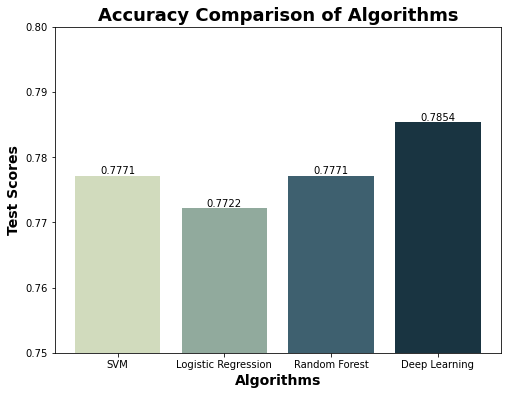

In [78]:
SVM_score = 1-Pe_rbf
LR_score = 1-Pe_lr
RF_score = 1-Pe_rf
DL_score = accuracy

# Names of the algorithms
algorithms = ['SVM', 'Logistic Regression', 'Random Forest', 'Deep Learning']

# Corresponding test scores
scores = [SVM_score, LR_score, RF_score, DL_score]  # Replace these with your actual test scores

plt.figure(figsize=(8, 6))

# Create a bar chart
bars = plt.bar(algorithms, scores, color=[(209.0/255,219.0/255,189.0/255), (145.0/255,170.0/255,157.0/255), (62.0/255,96.0/255,111.0/255), (25.0/255,52.0/255,65.0/255)])

# Add title and labels
plt.title('Accuracy Comparison of Algorithms', fontsize=18, fontweight='bold')
plt.xlabel('Algorithms', fontsize=14, fontweight='bold')
plt.ylabel('Test Scores', fontsize=14, fontweight='bold')
plt.ylim(0.75, 0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.savefig('my_plot.png', dpi=600)
# Display the plot
plt.show()

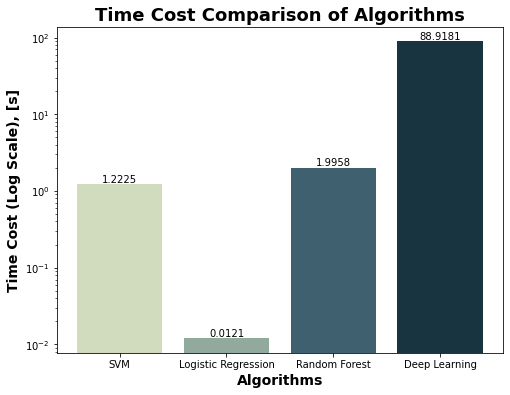

In [137]:
# Names of the algorithms
algorithms = ['SVM', 'Logistic Regression', 'Random Forest', 'Deep Learning']

# Corresponding test scores
cost = [t_svm, t_lr, t_rf, t_dl]  # Replace these with your actual test scores
cost_in_seconds = [c.total_seconds() for c in cost]

plt.figure(figsize=(8, 6))

# Create a bar chart
bars = plt.bar(algorithms, cost_in_seconds, color=[(209.0/255,219.0/255,189.0/255), (145.0/255,170.0/255,157.0/255), (62.0/255,96.0/255,111.0/255), (25.0/255,52.0/255,65.0/255)])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# 添加标题和标签

plt.yscale('log')

# Add title and labels
plt.title('Time Cost Comparison of Algorithms', fontsize=18, fontweight='bold')
plt.xlabel('Algorithms', fontsize=14, fontweight='bold')
plt.ylabel('Time Cost (Log Scale), [s]', fontsize=14, fontweight='bold')


plt.savefig('my_plot.png', dpi=600)
# Display the plot
plt.show()